# Text classification project

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
#training the data on these categories
train=fetch_20newsgroups(subset='train',categories=categories)
#testing the data for these categories
test=fetch_20newsgroups(subset='test',categories=categories)
print(train.data[3])
print("################$$$$$$$$$$$$$$$$$$$$$$$$$$$$$########################")
print(test.data[1])

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters

################$$$$$$$$$$$$$$$$$$$$$$$$$$$$$########################
From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Pos

In [6]:
# importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#creating model based on multinomial data
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
# training the model with the train data
model.fit(train.data,train.target)

# creating labels for the test data
labels=model.predict(test.data)

Text(113.92222222222219, 0.5, 'predicted label')

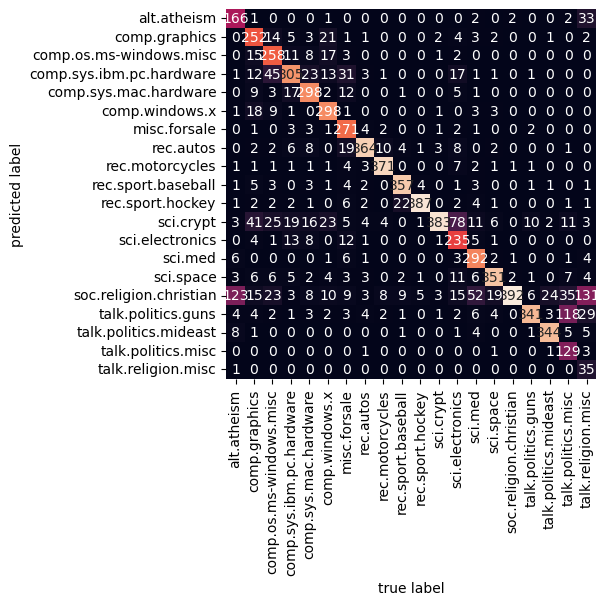

In [7]:
# creating confusion matrix and heatmap
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
# plotting heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [8]:
# predicting category on new data based on trained model
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]


#### predicting some categories

In [9]:
predict_category('Lord Vishnu')

'soc.religion.christian'

In [10]:
predict_category('isro launches a new rocket to the moon')

'sci.space'

In [11]:
predict_category('sachin tendulkar')

'rec.sport.hockey'

In [12]:
predict_category('audi and benz are good competiters in their field')

'rec.autos'